In [10]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import hilbert

plt.rcParams['xtick.labelsize'] = 14
plt.rcParams['ytick.labelsize'] = 14

def KOP(x):
    '''
    calculate the kuramoto order parameter from given time series
    Parameters
    ----------
    x: 2d array
        time series, shape (n, t)
    Returns
    -------
    r: float
        average kuramoto order parameter
    '''
    
    # extract the phase time series
    x_h = hilbert(x, axis=1)   
    x_phase = np.angle(x_h)

    # calculate the order parameter
    r = np.abs(np.mean(np.exp(1j*x_phase), axis=0))
    return np.mean(r)


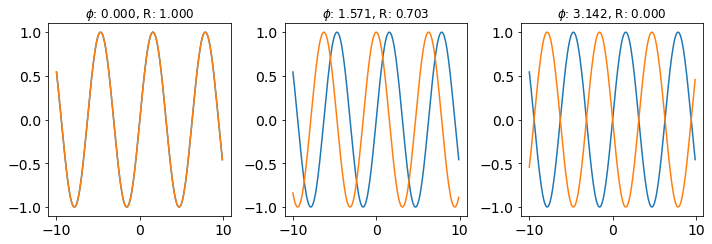

In [11]:
def func(x, phi, ax):
    y1 = np.sin(x)
    y2 = np.sin(x+phi)
    y = np.vstack([y1,y2])
    ax.plot(x,y1)
    ax.plot(x,y2)
    ax.set_title(f"$\phi$:{phi:6.3f}, R:{KOP(y):6.3f}")

fig, ax = plt.subplots(1,3,figsize=(10,3.5))
x = np.arange(-10,10,0.1)

func(x, 0, ax[0])
func(x, np.pi/2, ax[1])
func(x, np.pi, ax[2])
plt.tight_layout()